In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import mdtraj as md
plt.rcParams['figure.figsize'] = (10, 10)
plt.rcParams['font.size'] = 10

/home/lz2826/.local/lib/python3.8/site-packages/numpy/core/getlimits.py:500: UserWarning: The value of the smallest subnormal for <class 'numpy.float64'> type is zero.
  setattr(self, word, getattr(machar, word).flat[0])
/home/lz2826/.local/lib/python3.8/site-packages/numpy/core/getlimits.py:89: UserWarning: The value of the smallest subnormal for <class 'numpy.float64'> type is zero.
  return self._float_to_str(self.smallest_subnormal)
/home/lz2826/.local/lib/python3.8/site-packages/numpy/core/getlimits.py:500: UserWarning: The value of the smallest subnormal for <class 'numpy.float32'> type is zero.
  setattr(self, word, getattr(machar, word).flat[0])
/home/lz2826/.local/lib/python3.8/site-packages/numpy/core/getlimits.py:89: UserWarning: The value of the smallest subnormal for <class 'numpy.float32'> type is zero.
  return self._float_to_str(self.smallest_subnormal)


In [3]:
def select_ca(f_name):
    f_name_select = f_name.top.select("name =~ 'CA'")
    f_name_ca = f_name.atom_slice(f_name_select)
    return f_name_ca

In [4]:
path_c='./pdb/1lys_out.pdb'
fc = md.load_pdb(path_c)
ls_cola=[]
for i in range(1,6):
    path_p1='./pdb/1lys_cola_rank_'+str(i)+'.pdb'
    fp1 = md.load_pdb(path_p1)
    rmsd_fp1=md.rmsd(fp1,fc)
    rmsd_fp1_ca=md.rmsd (select_ca(fp1),select_ca(fc))
    ls_cola.append([rmsd_fp1,rmsd_fp1_ca])

In [5]:
ls_g=[]
for n in range(5):
    path_p2='./pdb/ranked_'+str(n)+'_out.pdb'
    fp2 = md.load_pdb(path_p2)
    rmsd_fp2=md.rmsd(fp2,fc)
    rmsd_fp2_ca= md.rmsd(select_ca(fp2),select_ca(fc))
    ls_g.append([rmsd_fp2,rmsd_fp2_ca])

In [6]:
ls_all =ls_cola+ls_g
print(ls_all)

[[array([0.13198085], dtype=float32), array([0.06221357], dtype=float32)], [array([0.1270765], dtype=float32), array([0.06205747], dtype=float32)], [array([0.12919995], dtype=float32), array([0.0576997], dtype=float32)], [array([0.13061322], dtype=float32), array([0.06188568], dtype=float32)], [array([0.13236044], dtype=float32), array([0.06311771], dtype=float32)], [array([0.13116348], dtype=float32), array([0.06049386], dtype=float32)], [array([0.1256419], dtype=float32), array([0.05573726], dtype=float32)], [array([0.13331065], dtype=float32), array([0.061508], dtype=float32)], [array([0.13043459], dtype=float32), array([0.05623587], dtype=float32)], [array([0.12632984], dtype=float32), array([0.06401093], dtype=float32)]]


In [7]:
for x in ls_all:
    x[0] =float(str(x[0]).replace('[','').replace(']',''))
    x[1] =float(str(x[1]).replace('[','').replace(']',''))
print(ls_all)

[[0.13198085, 0.06221357], [0.1270765, 0.06205747], [0.12919995, 0.0576997], [0.13061322, 0.06188568], [0.13236044, 0.06311771], [0.13116348, 0.06049386], [0.1256419, 0.05573726], [0.13331065, 0.061508], [0.13043459, 0.05623587], [0.12632984, 0.06401093]]


In [8]:
df=pd.DataFrame(ls_all)
df

,0,1
0,0.131981,0.062214
1,0.127077,0.062057
2,0.129200,0.057700
3,0.130613,0.061886
4,0.132360,0.063118
5,0.131163,0.060494
6,0.125642,0.055737
7,0.133311,0.061508
8,0.130435,0.056236
9,0.126330,0.064011


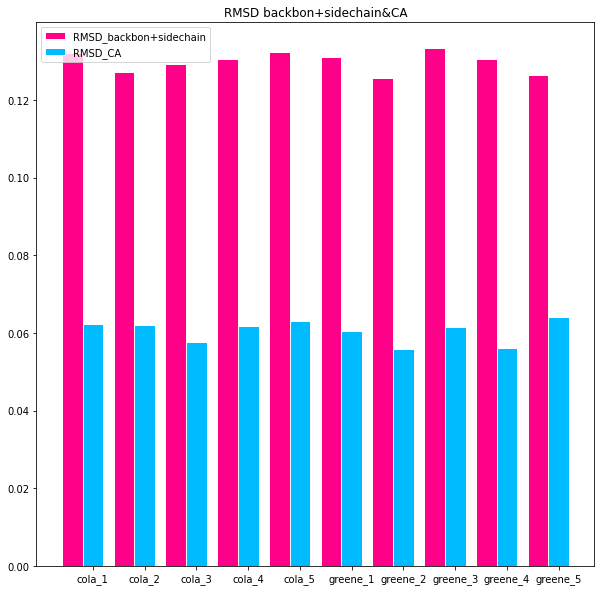

<Figure size 720x720 with 0 Axes>

In [9]:
barWidth = 0.4
r1 = np.arange(len(df[0]))
r2 = [x + barWidth for x in r1]
plt.bar(r1,df[0], color='#FF0088',width=barWidth, edgecolor='white', label='RMSD_backbon+sidechain')
plt.bar(r2,df[1], color='#00BBFF',width=barWidth, edgecolor='white', label='RMSD_CA')
plt.xticks([r + barWidth for r in range(len(df[0]))], ['cola_1','cola_2','cola_3','cola_4','cola_5','greene_1','greene_2','greene_3','greene_4','greene_5'])
plt.title('RMSD backbon+sidechain&CA')
plt.legend()
plt.show()
plt.savefig('./pdb/RMSD_bar_backbon+sidechain&CA.png')

In [12]:
import pickle as pck
PLDDT=[]
for i in range(1,6):
    path ='./prediction/1LYS/result_model_'+str(i)+'_pred_0.pkl'
    #path2='./prediction/1LYS/result_model_'+str(i)+'_pred_0.pkl'
    with open(path, 'rb') as f:
         r = pck.load(f)
    plddt=r['ranking_confidence']
    PLDDT.append(plddt)
print(PLDDT)

[97.87078179274556, 98.02481151850668, 97.94533352746858, 97.86388590520104, 98.05822775364389]


In [17]:
RMSD=np.array([0.131163,0.125642,0.133311,0.130435,0.126330])

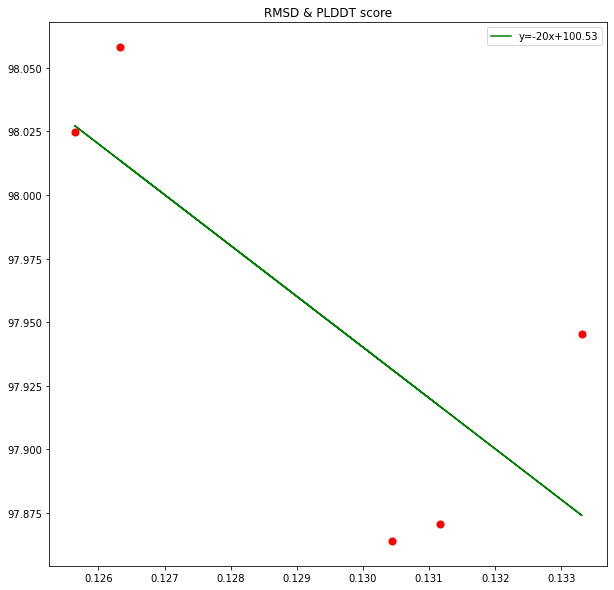

-19.993769215207355 100.53932598425364


<Figure size 720x720 with 0 Axes>

In [24]:
plddt=np.array(PLDDT) 
parameter = np.polyfit(RMSD,plddt, 1)
y = parameter[0] * RMSD  + parameter[1]
plt.scatter(RMSD,PLDDT,c='red' ,s=50)
plt.title('RMSD & PLDDT score')
plt.plot(RMSD, y, color='g',label='y=-20x+100.53')
plt.legend()
plt.show()
plt.savefig('./pdb/RMSD&PLDDT_score.png')
print(parameter[0],parameter[1])